In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
% matplotlib inline
import os
print(os.listdir("../input"))
import warnings
warnings.filterwarnings("ignore")

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [2]:
train=pd.read_csv("../input/Admission_Predict_Ver1.1.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [4]:
train.shape

(500, 9)

In [5]:
train.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data=train.drop(columns=["Serial No."],axis=1)

In [9]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


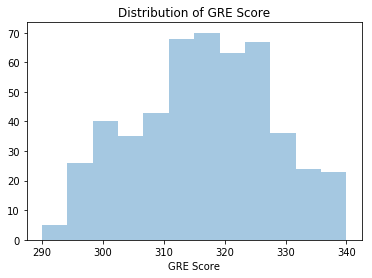

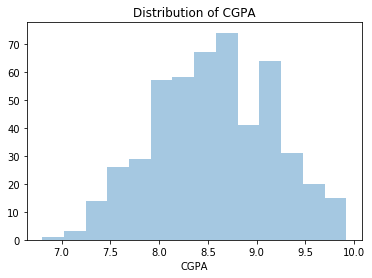

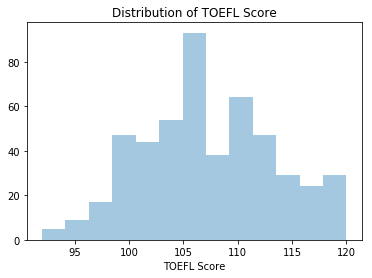

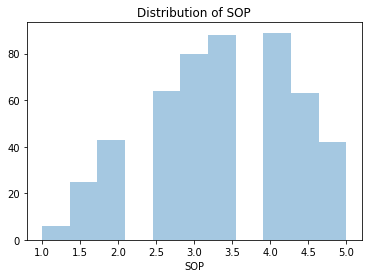

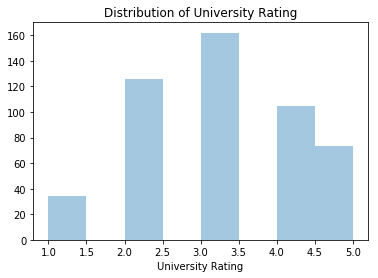

In [10]:
# let see distribution of  the variable
fig=sns.distplot(data['GRE Score'],kde=False)
plt.title("Distribution of GRE Score")
plt.show()

fig = sns.distplot(data['CGPA'],kde=False)
plt.title("Distribution of CGPA")
plt.show()

fig = sns.distplot(data["TOEFL Score"],kde=False)
plt.title("Distribution of TOEFL Score")
plt.show()

fig = sns.distplot(data["SOP"],kde=False)
plt.title("Distribution of SOP")
plt.show()

fig = sns.distplot(data["University Rating"],kde=False)
plt.title("Distribution of University Rating")
plt.show()

## Understanding the relation between different factors responsible for graduate admissions

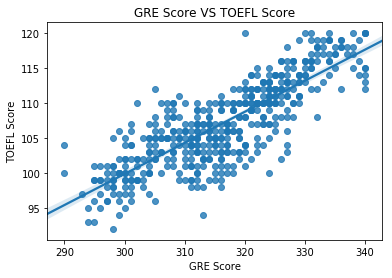

In [11]:
fig=sns.regplot(x="GRE Score",y="TOEFL Score",data=data)
plt.title("GRE Score VS TOEFL Score")
plt.show()

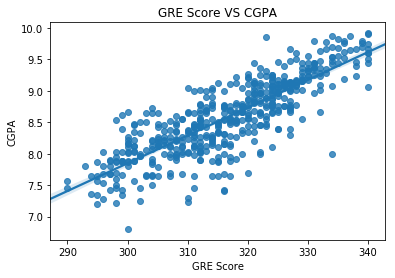

In [12]:
fig=sns.regplot(x="GRE Score",y="CGPA",data=data)
plt.title("GRE Score VS CGPA")
plt.show()

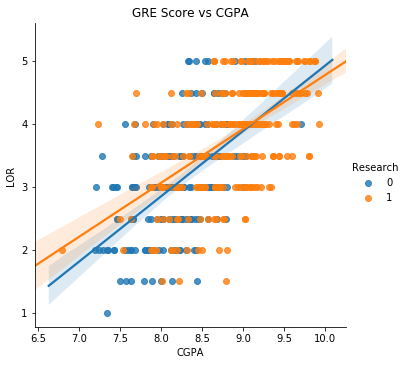

In [13]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=data, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

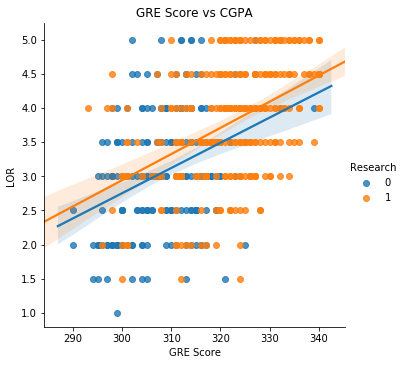

In [14]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=data, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

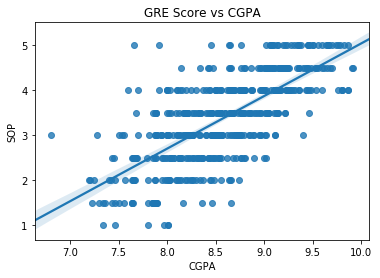

In [15]:
fig = sns.regplot(x="CGPA", y="SOP", data=data)
plt.title("GRE Score vs CGPA")
plt.show()



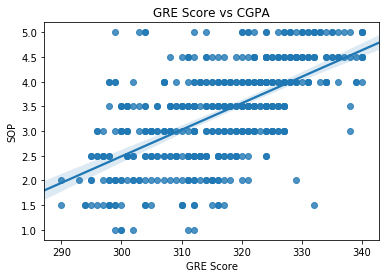

In [16]:
fig = sns.regplot(x="GRE Score", y="SOP", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

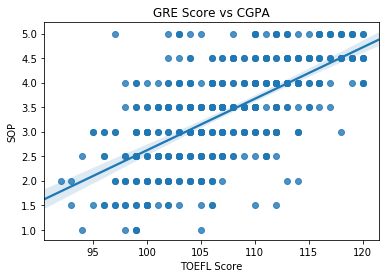

In [17]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

## Lets see Correlation between variables

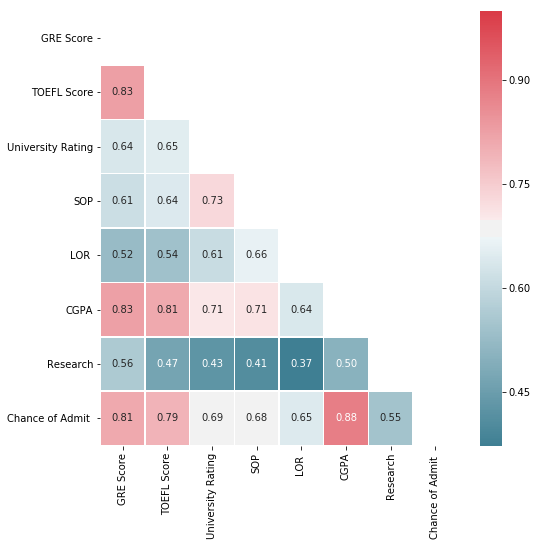

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [19]:
# Split data train & test
from sklearn.model_selection import train_test_split

X = data.drop(['Chance of Admit '], axis=1)
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [20]:
# Applying alogorithms 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor



models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()]]
           
          

print("Results...")

for name, model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))


Results...
DecisionTree : 0.09542536350467834
Linear Regression : 0.042932207462518565
Lasso:  0.11488570174881235
Ridge:  0.04289400118357374
BayesianRidge:  0.04289637628334988
ElasticNet:  0.08739127414117272
HuberRegressor:  0.05774067541465089
RandomForest : 0.05234166600329032
KNeighbours : 0.06980687645210894
SVM : 0.08504061872248211
AdaBoostClassifier : 0.0559329212994637
GradientBoostingClassifier:  0.04726753781674342
